In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.isnull().sum()


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [14]:
df=df.drop('ADDRESSLINE2',axis=1)

In [16]:
df=df.drop('TERRITORY',axis=1)

In [20]:
df['STATE'].fillna('UNKNOWN',inplace=True)

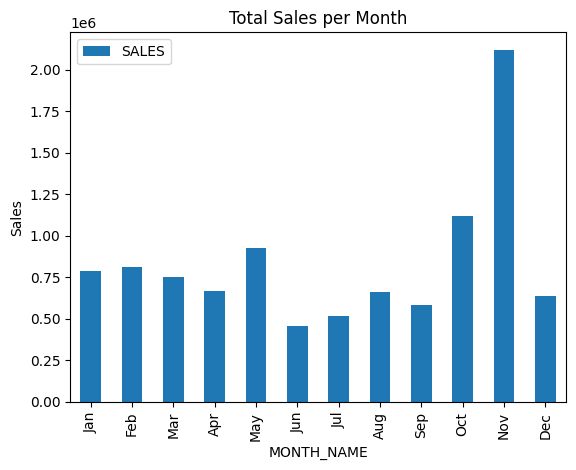

In [50]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['MONTH_NUM'] = df['ORDERDATE'].dt.month
df['MONTH_NAME'] = df['ORDERDATE'].dt.strftime('%b')
monthly_sales = df.groupby('MONTH_NUM')[['SALES']].sum()
monthly_sales['MONTH_NAME'] = df.groupby('MONTH_NUM')['MONTH_NAME'].first()
monthly_sales.set_index('MONTH_NAME', inplace=True)
monthly_sales.plot(kind='bar', title='Total Sales per Month')
plt.xlabel('MONTH_NAME')
plt.ylabel('Sales')
plt.show()


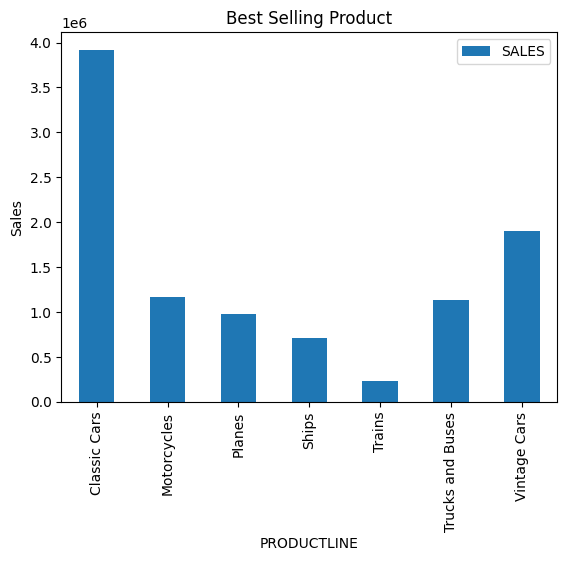

In [58]:
BestSellingProduct = df.groupby('PRODUCTLINE')[['SALES']].sum()
BestSellingProduct.plot(kind='bar', title='Best Selling Product')
plt.xlabel('PRODUCTLINE')
plt.ylabel('Sales')
plt.show()

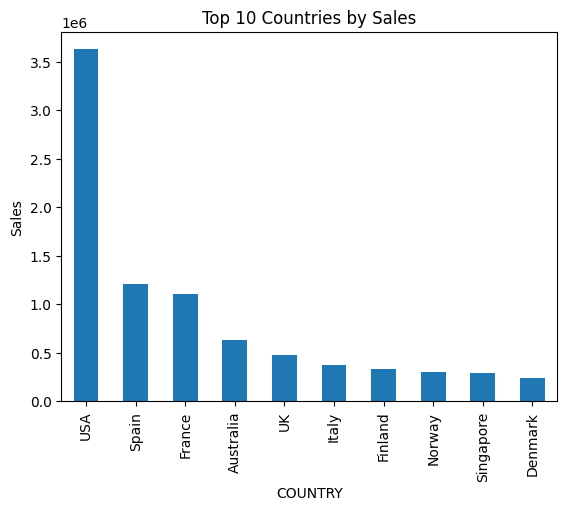

In [67]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)

country_sales.plot(kind='bar', title='Top 10 Countries by Sales')
plt.xlabel('COUNTRY')
plt.ylabel('Sales')
plt.show()


##  Insights
- Sales peaked in [November]
- The top-performing product line was [Classic Cars]
- [USA] had the highest total sales.